In [2]:
import tensorflow as tf
import datetime


if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import pandas as pd

In [4]:
df = pd.read_csv('FinalList.csv')
df

,ID,Fuel,Class,Sub-Class,Group,BP2,Uncertainty,Source,SMILES,Molecular Formula,...,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
0,1,"1,3,5-trimethylbenzene",Hydrocarbons,Aromatic hydrocarbons,Monocyclic aromatic hydrocarbons,437.908,0.182452,NIST,Cc1cc(C)cc(C)c1,C9H12,...,0,6,119.007881,0.810185,0.023771,-1.532920,-4.779854,58.506429,0.142741,0.128051
1,2,1-Butene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,266.844,0.244792,NIST,CCC=C,C4H8,...,0,0,97.357465,1.260417,0.026443,-1.232569,-5.459298,16.143384,0.192906,0.349211
2,3,1-Pentene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,303.102,0.065615,NIST,CCCC=C,C5H10,...,0,0,128.152792,1.312500,0.026643,-1.308787,-5.161937,25.164912,0.163565,0.296013
3,4,"2,3-Dimethylpentane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,362.941,0.395675,NIST,CCC(C)C(C)C,C7H16,...,0,0,185.939758,1.183248,0.019681,-1.059327,-3.541765,58.142762,0.077032,0.165887
4,5,"2,5-dimethylhexane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,382.231,0.067620,NIST,CC(C)CCC(C)C,C8H18,...,0,0,207.363945,1.222512,0.019948,-1.227298,-3.733328,65.151442,0.066477,0.140495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,valeric acid,Carboxylic acids and salts,Aliphatic carboxylic acids,Alkylcarboxylic acids,459.293,0.059580,NIST,CCCCC(O)=O,C5H10O2,...,2,0,84.839551,0.893164,0.043941,-7.565020,-27.383187,30.517432,0.337332,0.536041
308,309,"1,1-dimethoxyethane",Acetals,Aliphatic acetals,Alkyl acetals,336.695,1.850290,NIST,COC(C)OC,C4H10O2,...,2,0,173.818431,1.128388,0.038517,-2.858090,-10.848476,21.707281,0.211493,0.490707
309,310,dimethyl peroxide,Organic peroxides,Other peroxides,Other peroxides,270.414,11.082100,NIST,COOC,C2H6O2,...,2,0,117.440572,1.052965,0.046742,-2.374345,-11.250341,5.997508,0.148167,0.500000
310,311,heptane-3-peroxol,Organic peroxides,Hydroperoxides,Aliphatic hydroperoxides,459.704,1.508060,NIST,CCCCC(CC)OO,C7H16O2,...,2,0,171.625428,1.106192,0.031590,-4.779775,-13.715054,53.241940,0.329739,0.325457


In [5]:
# keep = ['BP2',
#  'Wiener',
#  'WNSA3',
#  'Mor16se',
#  'AromaticR',
#  'GATS1v',
#  'Mor10v',
#  'RNCG',
#  'SIC0',
#  'LUMO',
#  'BalabanJ',
#  'HBondD',
#  'JGI1',
#  'HOMO',
#  'FPSA3']
# keep = ['BP2','MW','GGI4','RNCG','SIC0','Mor16se','WNSA3','Mor10v','BalabanJ','CIC3','HOMO']
keep = ['BP2','Wiener','WNSA3','GATS1v','DM','BalabanJ','HBondD']
df2 = df[keep]
df2

,BP2,Wiener,WNSA3,GATS1v,DM,BalabanJ,HBondD
0,437.908,84,-1.532920,1.111111,0.037601,2.340852,0
1,266.844,10,-1.232569,1.500000,0.336790,1.974745,0
2,303.102,20,-1.308787,1.500000,0.328765,2.190610,0
3,362.941,46,-1.059327,1.642857,0.056010,3.144208,0
4,382.231,74,-1.227298,1.625000,0.078138,2.927819,0
...,...,...,...,...,...,...,...
307,459.293,52,-7.565020,1.395437,1.302018,2.678258,1
308,336.695,31,-2.858090,1.745497,1.843983,2.754185,0
309,270.414,10,-2.374345,1.848186,1.394303,1.974745,0
310,459.704,104,-4.779775,1.540004,1.664803,3.092246,1


In [6]:
features = df2[df2.columns[1:]]
input_dim = features.shape[1]
input_dim

6

In [7]:
classes = df['Class']
classes

0                    Hydrocarbons
1                    Hydrocarbons
2                    Hydrocarbons
3                    Hydrocarbons
4                    Hydrocarbons
                  ...            
307    Carboxylic acids and salts
308                       Acetals
309             Organic peroxides
310             Organic peroxides
311             Organic peroxides
Name: Class, Length: 312, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

x = df2.drop(['BP2'],axis = 1).to_numpy()
y = df2['BP2'].values
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=classes,random_state = 0)

In [9]:
y_test

array([382.965  , 342.043  , 436.589  , 603.138  , 313.337  , 382.231  ,
       304.249  , 394.157  , 374.01   , 353.865  , 342.209  , 366.766  ,
       270.414  , 487.838  , 293.412  , 280.08   , 455.644  , 510.259  ,
       623.251  , 338.165  , 372.877  , 404.058  , 363.407  , 395.365  ,
       355.372  , 446.445  , 488.492  , 473.868  , 378.016  , 464.554  ,
       434.446  , 419.8    , 522.82   , 596.319  , 559.249  , 370.187  ,
       370.559  , 418.432  , 279.623  , 266.743  , 325.474  , 397.428  ,
       390.976  , 329.225  , 409.37222, 457.234  , 554.935  , 276.874  ,
       413.395  , 358.69   , 374.427  , 311.684  , 375.432  , 272.65   ,
       377.91   , 396.625  , 342.039  , 414.145  , 447.27   , 474.184  ,
       341.577  , 370.142  , 485.632  ])

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

In [12]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
x_train.shape[1:]
x_train.shape[1]

6

In [13]:
# model = keras.models.Sequential([
#     keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
#     keras.layers.Dense(1)
# ])
from keras.models import Sequential
from keras.layers import Dense, Dropout


l1 = 280
r1 = .4
l2 = 280
r2 = .4
loss = 'mean_squared_error'
#'he_uniform'

model = Sequential()
model.add(Dense(l1, input_dim=input_dim, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(r1))
model.add(Dense(l2, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(r2))
model.add(Dense(1, kernel_initializer='he_normal'))
model.compile(loss=loss, optimizer='adam')
#adam

In [14]:
# model.compile(loss="mean_squared_error",optimizer='sgd')

In [15]:
history = model.fit(x_train,y_train,epochs=17000)

Epoch 1/17000
8/8 [==============================] - 15s 4ms/step - loss: 155950.4497
Epoch 2/17000
8/8 [==============================] - 0s 4ms/step - loss: 156661.2309
Epoch 3/17000
8/8 [==============================] - 0s 5ms/step - loss: 146298.6458
Epoch 4/17000
8/8 [==============================] - 0s 5ms/step - loss: 137739.1562
Epoch 5/17000
8/8 [==============================] - 0s 4ms/step - loss: 126914.8099
Epoch 6/17000
8/8 [==============================] - 0s 3ms/step - loss: 101968.0382
Epoch 7/17000
8/8 [==============================] - 0s 3ms/step - loss: 87604.8351
Epoch 8/17000
8/8 [==============================] - 0s 3ms/step - loss: 69424.8342
Epoch 9/17000
8/8 [==============================] - 0s 3ms/step - loss: 44595.3798
Epoch 10/17000
8/8 [==============================] - 0s 4ms/step - loss: 31244.1176
Epoch 11/17000
8/8 [==============================] - 0s 4ms/step - loss: 18680.6131
Epoch 12/17000
8/8 [==============================] - 0s 3ms/step -

In [20]:
mse_test = model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 164.8908


In [21]:
# x_new = x_test[:3]

In [22]:
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import r2_score
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.991, test: 0.976


In [24]:
from sklearn.metrics import mean_squared_error

print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train,y_train_pred,squared=False),
        mean_squared_error(y_test, y_test_pred,squared=False)))

RMSE train: 7.722, test: 12.841


In [25]:
y_train_pred_copy = y_train_pred.copy()
y_train_pred_flat= y_train_pred_copy.flatten()
y_test_pred_copy = y_test_pred.copy()
y_test_pred_flat = y_test_pred_copy.flatten()

In [26]:
frames = []
for i in y_test:
    res = df.loc[df.BP2==i]
    frames.append(res)

In [27]:
len(frames)

63

In [28]:
result = pd.concat(frames)
result

,ID,Fuel,Class,Sub-Class,Group,BP2,Uncertainty,Source,SMILES,Molecular Formula,...,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
129,130,"2,2,3-trimethylpentane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,382.965,0.016939,NIST,CCC(C)C(C)(C)C,C8H18,...,0,0,190.324025,1.034433,0.019191,-1.203561,-3.821300,76.197892,0.070096,0.149567
189,190,cis-2-hexene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,342.043,0.198630,NIST,CCC\C=C/C,C6H12,...,0,0,155.912425,1.275000,0.024872,-1.217907,-4.287714,32.183671,0.150380,0.240837
223,224,hexanenitrile,Nitriles,Aliphatic nitriles,Alkyl nitriles,436.589,0.055921,NIST,CCCCCC#N,C6H11N,...,1,0,128.432499,1.151885,0.022782,-3.936614,-13.169185,36.376842,0.150549,0.480663
269,270,n-nonadecane,Hydrocarbons,Aliphatic hydrocarbons,Alkanes,603.138,0.759316,NIST,CCCCCCCCCCCCCCCCCCC,C19H40,...,0,0,461.404754,1.461380,0.022514,-2.970483,-4.749027,156.361083,0.025548,0.062672
103,104,Cyclopentadiene,Hydrocarbons,Alicyclic hydrocarbons,Cycloalkenes,313.337,0.073512,NIST,C1C=CC=C1,C5H6,...,0,0,53.163958,1.222222,0.032371,-1.225059,-5.587843,16.474822,0.199567,0.260206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,25,Decane,Hydrocarbons,Aliphatic hydrocarbons,Alkanes,447.270,0.139776,NIST,CCCCCCCCCC,C10H22,...,0,0,297.972000,1.427879,0.021959,-1.372657,-3.358829,75.167323,0.047300,0.116031
140,141,"2,6-xylenol",Alcohols,Aromatic alcohols,Monocyclic aromatic alcohols,474.184,0.019373,NIST,Cc1cccc(C)c1O,C8H10O,...,1,6,70.716151,0.734428,0.035557,-5.248586,-17.455254,50.266861,0.380536,0.658724
30,31,Diisopropyl ether,Ethers,Aliphatic ethers,Alkyl ethers,341.577,0.141168,NIST,CC(C)OC(C)C,C6H14O,...,1,0,173.406757,1.036907,0.022651,-1.416536,-4.717522,38.497791,0.112337,0.707170
17,18,Allyl alcohol,Alcohols,Aliphatic alcohols,Primary,370.142,0.074156,NIST,OCC=C,C3H6O,...,1,0,50.903560,1.271061,0.050172,-3.998793,-18.902092,10.109507,0.376140,0.701034


In [29]:
# result['Predicted Train Set Values']
result.insert(6, 'Predicted Test Set Values', y_test_pred_flat)
result

,ID,Fuel,Class,Sub-Class,Group,BP2,Predicted Test Set Values,Uncertainty,Source,SMILES,...,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
129,130,"2,2,3-trimethylpentane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,382.965,391.402191,0.016939,NIST,CCC(C)C(C)(C)C,...,0,0,190.324025,1.034433,0.019191,-1.203561,-3.821300,76.197892,0.070096,0.149567
189,190,cis-2-hexene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,342.043,341.737518,0.198630,NIST,CCC\C=C/C,...,0,0,155.912425,1.275000,0.024872,-1.217907,-4.287714,32.183671,0.150380,0.240837
223,224,hexanenitrile,Nitriles,Aliphatic nitriles,Alkyl nitriles,436.589,439.111176,0.055921,NIST,CCCCCC#N,...,1,0,128.432499,1.151885,0.022782,-3.936614,-13.169185,36.376842,0.150549,0.480663
269,270,n-nonadecane,Hydrocarbons,Aliphatic hydrocarbons,Alkanes,603.138,634.800476,0.759316,NIST,CCCCCCCCCCCCCCCCCCC,...,0,0,461.404754,1.461380,0.022514,-2.970483,-4.749027,156.361083,0.025548,0.062672
103,104,Cyclopentadiene,Hydrocarbons,Alicyclic hydrocarbons,Cycloalkenes,313.337,322.097076,0.073512,NIST,C1C=CC=C1,...,0,0,53.163958,1.222222,0.032371,-1.225059,-5.587843,16.474822,0.199567,0.260206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,25,Decane,Hydrocarbons,Aliphatic hydrocarbons,Alkanes,447.270,432.505402,0.139776,NIST,CCCCCCCCCC,...,0,0,297.972000,1.427879,0.021959,-1.372657,-3.358829,75.167323,0.047300,0.116031
140,141,"2,6-xylenol",Alcohols,Aromatic alcohols,Monocyclic aromatic alcohols,474.184,474.261780,0.019373,NIST,Cc1cccc(C)c1O,...,1,6,70.716151,0.734428,0.035557,-5.248586,-17.455254,50.266861,0.380536,0.658724
30,31,Diisopropyl ether,Ethers,Aliphatic ethers,Alkyl ethers,341.577,365.552917,0.141168,NIST,CC(C)OC(C)C,...,1,0,173.406757,1.036907,0.022651,-1.416536,-4.717522,38.497791,0.112337,0.707170
17,18,Allyl alcohol,Alcohols,Aliphatic alcohols,Primary,370.142,362.054810,0.074156,NIST,OCC=C,...,1,0,50.903560,1.271061,0.050172,-3.998793,-18.902092,10.109507,0.376140,0.701034


In [30]:
result.to_csv('TEST2_results.csv', encoding='utf-8', index=False)

In [31]:
frames2 = []
for j in y_train:
    res2 = df.loc[df.BP2==j]
    frames2.append(res2)

In [32]:
len(frames2)

249

In [33]:
result2 = pd.concat(frames2)
result2

,ID,Fuel,Class,Sub-Class,Group,BP2,Uncertainty,Source,SMILES,Molecular Formula,...,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
257,258,"N,N-dimethylaniline",Amines,Aromatic amines,Tertiary aromatic amines,466.648,0.857744,NIST,CN(C)c1ccccc1,C8H11N,...,1,6,153.223696,1.024651,0.035422,-1.609975,-5.261563,50.939671,0.101078,0.592175
41,42,Isoamyl alcohol,Alcohols,Aliphatic alcohols,Primary,404.014,0.190327,NIST,CC(C)CCO,C5H12O,...,1,0,145.385228,1.180958,0.039451,-4.144554,-15.236374,36.482143,0.353448,0.667001
79,80,tetralin,Hydrocarbons,Aromatic hydrocarbons,Polycyclic aromatic hydrocarbons,480.321,0.475033,NIST,C1CCc2ccccc2C1,C10H12,...,0,6,136.312599,1.100000,0.029398,-1.573931,-4.947627,73.542323,0.129244,0.128013
74,75,Propyl amine,Amines,Aliphatic amines,Primary aliphatic amines,320.360,0.048544,NIST,CCCN,C3H9N,...,1,0,134.845631,1.294688,0.041590,-1.855186,-8.241687,17.323335,0.265181,0.740318
228,229,isobutyl isobutyrate,Esters,Carboxylic acid esters,Aliphatic carboxylic acid esters,421.931,2.096300,NIST,CC(C)COC(=O)C(C)C,C8H16O2,...,2,0,169.565403,0.898768,0.025883,-5.065615,-14.333836,56.188394,0.322965,0.488022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,n-octane,Hydrocarbons,Aliphatic hydrocarbons,Alkanes,398.774,0.283796,NIST,CCCCCCCC,C8H18,...,0,0,240.801184,1.410590,0.021411,-1.086947,-3.158537,57.124265,0.058337,0.143107
153,154,2-methyl-3-ethylpentane,Hydrocarbons,Aliphatic hydrocarbons,Alkanes,388.776,0.016477,NIST,CCC(CC)C(C)C,C8H18,...,0,0,201.589462,1.222512,0.019682,-1.233164,-3.820478,68.170715,0.068514,0.146202
291,292,propionitrile,Nitriles,Aliphatic nitriles,Alkyl nitriles,370.408,0.293234,NIST,CCC#N,C3H5N,...,1,0,60.404131,0.882161,0.023442,-2.623685,-12.441690,9.312255,0.246769,0.791611
271,272,n-pentyl formate,Esters,Carboxylic acid esters,Aliphatic carboxylic acid esters,400.031,2.206240,NIST,CCCCCOC=O,C6H12O2,...,2,0,146.125823,1.161694,0.050967,-6.080675,-19.504308,37.934657,0.319949,0.511677


In [34]:
# result['Predicted Train Set Values']
result2.insert(6, 'Predicted Train Set Values', y_train_pred_flat)
result2

,ID,Fuel,Class,Sub-Class,Group,BP2,Predicted Train Set Values,Uncertainty,Source,SMILES,...,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
257,258,"N,N-dimethylaniline",Amines,Aromatic amines,Tertiary aromatic amines,466.648,455.853943,0.857744,NIST,CN(C)c1ccccc1,...,1,6,153.223696,1.024651,0.035422,-1.609975,-5.261563,50.939671,0.101078,0.592175
41,42,Isoamyl alcohol,Alcohols,Aliphatic alcohols,Primary,404.014,401.710144,0.190327,NIST,CC(C)CCO,...,1,0,145.385228,1.180958,0.039451,-4.144554,-15.236374,36.482143,0.353448,0.667001
79,80,tetralin,Hydrocarbons,Aromatic hydrocarbons,Polycyclic aromatic hydrocarbons,480.321,479.579895,0.475033,NIST,C1CCc2ccccc2C1,...,0,6,136.312599,1.100000,0.029398,-1.573931,-4.947627,73.542323,0.129244,0.128013
74,75,Propyl amine,Amines,Aliphatic amines,Primary aliphatic amines,320.360,314.742035,0.048544,NIST,CCCN,...,1,0,134.845631,1.294688,0.041590,-1.855186,-8.241687,17.323335,0.265181,0.740318
228,229,isobutyl isobutyrate,Esters,Carboxylic acid esters,Aliphatic carboxylic acid esters,421.931,417.814453,2.096300,NIST,CC(C)COC(=O)C(C)C,...,2,0,169.565403,0.898768,0.025883,-5.065615,-14.333836,56.188394,0.322965,0.488022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,n-octane,Hydrocarbons,Aliphatic hydrocarbons,Alkanes,398.774,392.751587,0.283796,NIST,CCCCCCCC,...,0,0,240.801184,1.410590,0.021411,-1.086947,-3.158537,57.124265,0.058337,0.143107
153,154,2-methyl-3-ethylpentane,Hydrocarbons,Aliphatic hydrocarbons,Alkanes,388.776,388.422638,0.016477,NIST,CCC(CC)C(C)C,...,0,0,201.589462,1.222512,0.019682,-1.233164,-3.820478,68.170715,0.068514,0.146202
291,292,propionitrile,Nitriles,Aliphatic nitriles,Alkyl nitriles,370.408,365.700958,0.293234,NIST,CCC#N,...,1,0,60.404131,0.882161,0.023442,-2.623685,-12.441690,9.312255,0.246769,0.791611
271,272,n-pentyl formate,Esters,Carboxylic acid esters,Aliphatic carboxylic acid esters,400.031,403.564606,2.206240,NIST,CCCCCOC=O,...,2,0,146.125823,1.161694,0.050967,-6.080675,-19.504308,37.934657,0.319949,0.511677


In [35]:
result2.to_csv('TRAIN2_results.csv', encoding='utf-8', index=False)

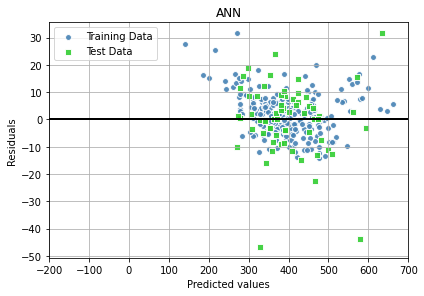

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(y_train_pred_flat,
            y_train_pred_flat- y_train,
            c= 'steelblue',
            edgecolor = 'white',
            marker = 'o',
            s = 35,
            alpha = 0.9,
            label = 'Training Data')

plt.scatter(y_test_pred_flat,
            y_test_pred_flat - y_test,
            c = 'limegreen',
            edgecolor = 'white',
            marker = 's',
            s=35,
            alpha = 0.9,
            label = 'Test Data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-200,xmax=700,lw=2,color='black')
plt.xlim([-200,700])
plt.tight_layout()
plt.grid()
plt.title('ANN')
plt.show()

In [37]:
res_test = y_test_pred_flat - y_test
res_test = res_test.tolist()
y_test_copy = y_test.copy().tolist()

list_of_tuples = list(zip(res_test, y_test_copy))

outliers = pd.DataFrame(list_of_tuples,columns=['Residuals','Actual BP'])
outliers

,Residuals,Actual BP
0,8.437191,382.965
1,-0.305482,342.043
2,2.522176,436.589
3,31.662476,603.138
4,8.760076,313.337
...,...,...
58,-14.764598,447.270
59,0.077780,474.184
60,23.975917,341.577
61,-8.087190,370.142


In [34]:
outliers.loc[outliers.Residuals<-49]

,Residuals,Actual BP
50,-55.15167,374.427


In [ ]:
df.loc[df.BP2==337.632]

In [ ]:
outliers.loc[outliers.Residuals>25]

In [ ]:
df.loc[df.BP2==603.1380]

In [ ]:
df.loc[df.BP2==655.8030]

In [ ]:
df.loc[df.BP2==240.2611]

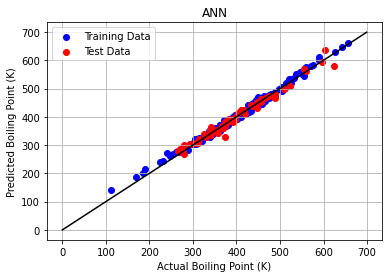

In [38]:
plt.scatter(y_train,y_train_pred_flat,color='blue',label='Training Data')
plt.scatter(y_test,y_test_pred_flat,color='red',label='Test Data')
plt.xlabel('Actual Boiling Point (K)')
plt.ylabel('Predicted Boiling Point (K)')
plt.legend(loc='upper left')
plt.grid()
plt.title('ANN')
plt.plot(range(700), range(700),'k')


# only save if you're satisfied with model performance

In [39]:
model.save("BEST_keras_ANN_ALL_BP_model.h5")

# LEAVE ONE OUT for training set

In [14]:
from keras.models import load_model
loaded_model = load_model('BEST_keras_ANN_ALL_BP_model.h5')

In [9]:
X = x_train.copy()
Y = y_train.copy()

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# create loocv procedure
cv = LeaveOneOut()
y_true, y_pred = list(), list()

for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = Y[train_ix], Y[test_ix]
    
    #fit model
    loaded_model.fit(X_train,y_train,epochs=5000)
    # evaluate model
    yhat = loaded_model.predict(X_test) #predicted
    # store
    y_true.append(y_test[0])
    y_pred.append(yhat[0])

In [26]:
print('R^2 train: %.3f' % (r2_score(y_true ,y_pred))) #Q^2: leave one out R^2

R^2 test: 0.983
